# Feed Forward Neural Network

In [ ]:
# Importing libraries and dataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.datasets import load_diabetes
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [ ]:
# Loading the dataset
data = load_diabetes()
x = data['data']
y = data['target']

In [ ]:
# Print the shape
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)

shape of x is :  (442, 10)
shape of y is :  (442,)


Dataset and dataloaders

In PyTorch, the class dataset covers the data in a tuple so as to make each data of the index accessible during training. 

In order to shuffle and apply Mini-Batch Gradient Descent or stochastic gradient descent it is necessary to create dataloader class.

In [ ]:
class inputdataset(Dataset):
  def __init__(self,x,y):
    # initialize the x and y of the dataset and convert them to tensors
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]

  def __getitem__(self,idx):
    # return a particular index (both x and y value) in the dataset
    return self.x[idx],self.y[idx]

  def __len__(self):
    # return the size of the dataset
    return self.length

In [ ]:
dataset = inputdataset(x,y)

In [ ]:
dataloader = DataLoader(dataset=dataset,shuffle=True,batch_size=100)

Create the Neural Network

In PyTorch, neural networks are created by using Object Oriented Programming.

The Functions are possible because of the class nn.Module from torch which was inherited.


In [ ]:
class net(nn.Module):
  def __init__(self,input_size,output_size):     # defining the layers 
    super(net,self).__init__()
    self.l1 = nn.Linear(input_size,5)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(5,output_size)

  def forward(self,x):    # defining the forward pass which is invoked automatically when the class is called
    output = self.l1(x) 
    output = self.relu(output)
    output = self.l2(output)
    return output

In [ ]:
# Define parameters
model = net(x.shape[1],1)
criterion = nn.MSELoss()    # Mean Squared Loss because this is a regression problem
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)    # takes in weights and biases of the network and learning rate
                                                              # weights are updated accordingly
epochs = 1500   # Number of iterations for training

The trained model is used to predict the values of the same inputs.

In [ ]:
cost_value = []
loss_values = []

for j in range(epochs):
  for i,(x_train,y_train) in enumerate(dataloader):
    #prediction
    y_pred = model(x_train)
    
    #calculating loss
    cost = criterion(y_pred,y_train.reshape(-1,1))
    #loss.append(cost)
    
    #backprop
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  if j%50 == 0:
    #print(cost)
    cost_value.append(cost)
  
#loss_values.append(cost_value / len(x_train))

The predicted values are plotted against the actual values. With this plot, we can see that the predicted and actual are almost similar even though there are some errors.

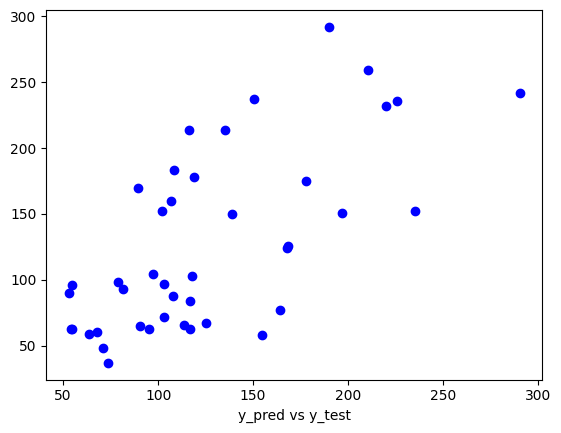

In [ ]:
x = y_pred.detach().numpy()
y = y_train.detach().numpy()
plt.scatter(x, y, color = "blue")
plt.xlabel("y_pred vs y_test")
plt.show()

### References
1. https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
2. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
3. https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
4. https://pytorch.org/vision/stable/datasets.html

# TASK : MNSIT Digit Recognizer

1. Implement multilayer neural network that can do digit classification based on the famous MNIST dataset.
2. Predict the accuracy on 10000 test images.
